# Statistical analysis with Z-score, Interquartile Range, Box Plot

---



In [ ]:
import numpy as np
from sklearn.datasets import make_blobs

#### Generate a random dataset with normal data points

Tips: use make_blobs from sklearn.datasets


In [ ]:
n_samples = 500
n_features = 2
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, cluster_std=1.0, random_state=42)

#### Introduce anomalies

In [ ]:
# Introduce anomalies
n_anomalies = 20
anomalies = np.random.uniform(low=-15, high=15, size=(n_anomalies, n_features))
X = np.vstack([X, anomalies])
y = np.hstack([y, np.ones(n_anomalies)])  # Label anomalies as 1

#### Shuffle the dataset

In [ ]:
shuffle_idx = np.arange(X.shape[0])
np.random.shuffle(shuffle_idx)
X = X[shuffle_idx]
y = y[shuffle_idx]

# Optionally, you can save the dataset to a CSV file
# import pandas as pd
# df = pd.DataFrame(np.c_[X, y], columns=[f"feature_{i}" for i in range(n_features)] + ['is_anomaly'])
# df.to_csv('anomaly_dataset.csv', index=False)

Save real outlier index

In [ ]:
 an_indices = np.where(y == 1)

#### Plot the dataset

In [ ]:
import matplotlib.pyplot as plt

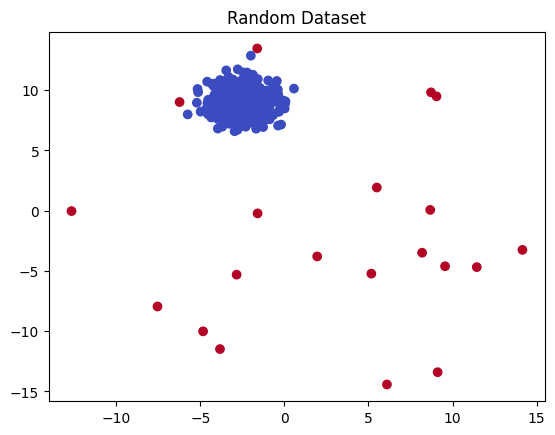

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Random Dataset")
plt.show()

Do analysis on first dimension

In [ ]:
ys = X[:, 1]

# Z-score

In [ ]:
# Calculate the mean and standard deviation of second dimension
mean = np.mean(ys)
std_dev = np.std(ys)

# Compute the Z-scores
z_scores = (ys - mean) / std_dev

# Set a threshold (e.g., 2 standard deviations)
threshold = 1

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)

# Print the outlier data points print("Outlier data points:")
print(ys[outliers])

[ 11.64666819  -4.68561057  -5.31049648  -3.25353228 -13.40766463
  11.47752824  -5.22959123  13.46346992  11.73445529  11.46958627
 -11.48794028 -14.42698116  -3.79666106  -0.22408787  -4.6105336
 -10.01626446   0.06358515  -7.95273002  -0.0323608    1.9217766
  -3.49078649  12.86701762]


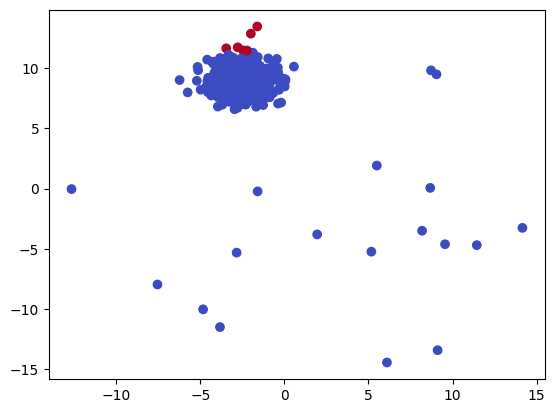

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=z_scores > threshold, cmap='coolwarm')

<ipython-input-83-8636ad2cd2f3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ys, hist=True, kde=True,


<Axes: ylabel='Density'>

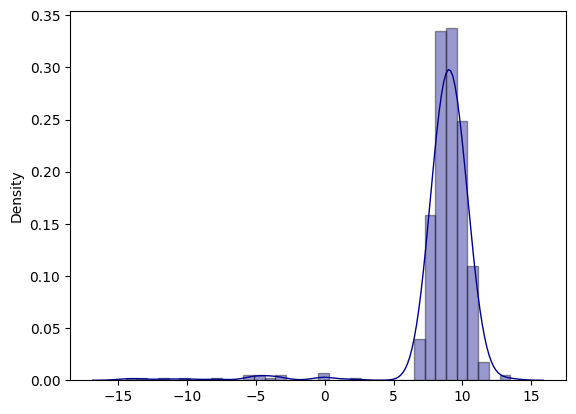

In [ ]:
import seaborn as sns
# Density Plot and Histogram of all arrival delays
sns.distplot(ys, hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

Though Z-Score is a highly efficient way of detecting and removing outliers, we cannot use it with every data type. When we said that, we mean that it only works with the data which is completely or close to normally distributed, which in turn stimulates that this method is not for skewed data, either left skew or right skew. For the other data, we have something known as Inter quartile range (IQR) method, which we will cover in the next article in depth.

# Box-Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7919c66d1e10>,
 'caps': [<matplotlib.lines.Line2D at 0x7919c65ee2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7919c66d2530>,
 'medians': [<matplotlib.lines.Line2D at 0x7919c65ee920>,
 'fliers': [<matplotlib.lines.Line2D at 0x7919c6787610>,
 'means': []}

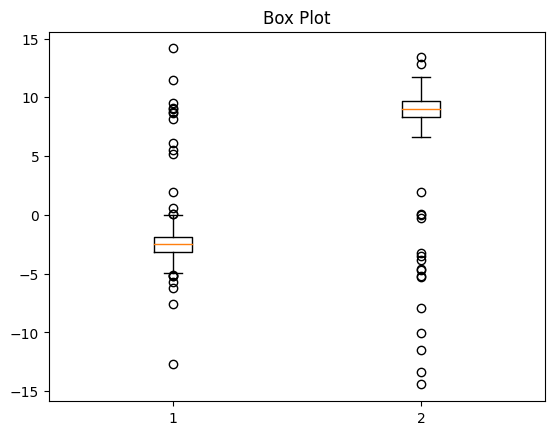

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot(X)

# Interquartile range

In [ ]:
# Calculate the 1quartile e 3quartile
quartile_1, quartile_3 = np.percentile(ys, [25, 75])

# Calculate Inter Quartile Range
iqr = quartile_3 - quartile_1

# Calculated bounds
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)

Calculate outlier indeces

In [ ]:
outliers_indices = np.where((ys > upper_bound) | (ys < lower_bound))

Prepare output for plotting

In [ ]:
y_hat = np.zeros(len(X[:, 1]))
y_hat[outliers_indices] = 1

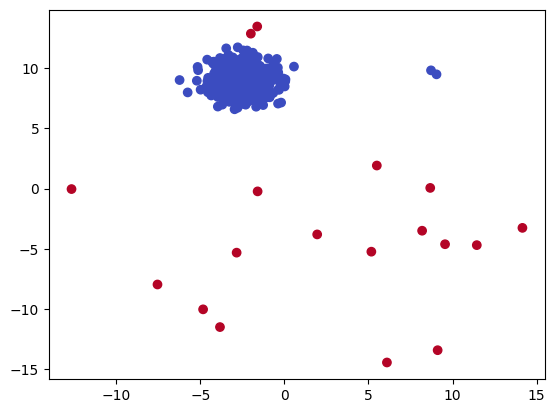

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_hat, cmap='coolwarm')